In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [44]:
# Loading Dataset
df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df[10] = df[10].replace(2, 0)
df[10] = df[10].replace(4, 1)
X_replace = df.replace('?',0)
np_array = np.array(X_replace).astype(float)
X = np_array[:, :10]
y = np_array[:, 10]

In [45]:
# Splitting the data in test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [59]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


140

In [47]:
# training the kNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f"  %accuracy)

Accuracy: 0.964286


In [49]:
# Error, Accuracy metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[88  4]
 [ 1 47]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        92
         1.0       0.92      0.98      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



Text(0, 0.5, 'Mean Error')

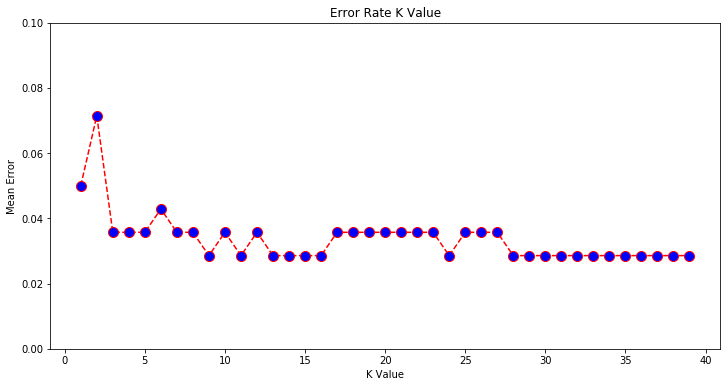

In [50]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.ylim(ymax = 0.1, ymin = 0.00)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [75]:
# save the model to disk
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)